In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
movies_df = pd.read_csv("C:\\Users\\Prabin\\Movies-list.csv", encoding='latin-1')

In [69]:
movies_df.sample(10, random_state=99)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
279,Friday,Matthew Vaughn,action,Kingsman: The Secret Service,13/02/2015,Fox,403.8,81.0,403.8,7.9,3.66,275.5,68.2,322.8,398.5,129,128.2,31.8
555,Friday,Alfonso Cuarn,adventure,Harry Potter and the Prisoner of Azkaban,4/06/2004,WB,"1,003",130.0,796.7,7.8,3.75,547.1,68.7,666.7,512.9,141,249.5,31.3
364,Friday,Tim Burton,action,Planet of the Apes (2001),27/07/2001,Fox,486.4,100.0,362.2,5.7,2.74,182.2,50.3,262.2,262.2,119,180.0,49.7
86,Friday,Cameron Crowe,mystery,Vanilla Sky,14/12/2001,Paramount Pictures,273.1,70.0,203.4,6.9,3.36,102.8,50.5,133.4,190.6,136,100.6,49.5
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
171,Friday,"Steve Hickner, Simon J. Smith",animation,Bee Movie,2/11/2007,Pacific Data/DreamWorks,329.9,150.0,287.6,6.2,3.01,161,56.0,137.6,91.7,91,126.6,44.0
107,Friday,David Zucker,comedy,Scary Movie 3,24/10/2003,Dimension Films,285.2,45.0,220.7,5.4,2.46,110.7,50.2,175.7,390.4,84,110.0,49.8
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
543,Thursday,Steven Spielberg,action,The Lost World: Jurassic Park,22/05/1997,Universal,916.5,75.0,618.6,6.5,2.96,389.6,63.0,543.6,724.8,129,229.1,37.0
48,Thursday,Doug Liman,action,Jumper,14/02/2008,Fox,245.4,82.5,222.2,6.1,2.98,142.1,63.9,139.7,169.3,88,80.2,36.1


In [70]:
movies_df.shape

(608, 18)

In [71]:
movies_df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

** Renaming `columns` to better visualize datas later.**

#### Inconsistent data/ Typing Error/ Misunderstanding of Gross Income definition Terms.
In most cases, `Gross Income` is greater thean `Adjusted Gross Income`. But in our dataframe every `Adjusted Gross Income` is greater than `Gross Income`. `Gross Income` typically refers to the total revenue generated by a movie before deducting expenses, while `Adjusted Gross` or `Adjusted Gross Receipts` usually refers to the gross income after certain deductions, such as distribution fees or exhibitor splits, have been subtracted.

Adjusted with exchanging name of each columns.

In [72]:
movies_df.columns = ['Day_of_Week', 'Director', 'Genre', 'Title', 'Release_date', 'Studio',
                     'Gross_collection_mill','Budget_in_million', 'Adjusted_Gross_mill',
                     'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas_percent',
                     'Profit_in_mill', 'Profit_percent', 'Runtime_in_minutes',
                     'US_mill', 'Gross_percent_US']

In [73]:
movies_df.columns

Index(['Day_of_Week', 'Director', 'Genre', 'Title', 'Release_date', 'Studio',
       'Gross_collection_mill', 'Budget_in_million', 'Adjusted_Gross_mill',
       'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas_percent',
       'Profit_in_mill', 'Profit_percent', 'Runtime_in_minutes', 'US_mill',
       'Gross_percent_US'],
      dtype='object')

In [74]:
movies_df.size

10944

**Checking `Null` values in a dataframe.**

In [75]:
movies_df.isnull().sum()

Day_of_Week              0
Director                 0
Genre                    0
Title                    0
Release_date             0
Studio                   0
Gross_collection_mill    0
Budget_in_million        0
Adjusted_Gross_mill      0
IMDb_Rating              0
MovieLens_Rating         0
Overseas_mill            0
Overseas_percent         0
Profit_in_mill           0
Profit_percent           0
Runtime_in_minutes       0
US_mill                  0
Gross_percent_US         0
dtype: int64

**Checking `Duplicates` in a DataFrame**

In [76]:
movies_df.duplicated().value_counts()

False    608
Name: count, dtype: int64

In the above dataframe there is no any null value and duplicated values. So, we don't have to deal with it we keep data as it is.

#### Establishing correlation between two Different Ratings columns. And visualizing it using heatmap

In [77]:
corr_ratings = movies_df[['IMDb_Rating', 'MovieLens_Rating']].corr()

<Axes: >

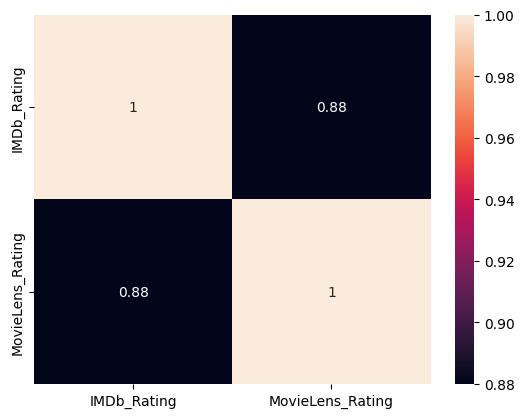

In [78]:
sns.heatmap(corr_ratings, annot=True)

In [79]:
movies_df['Studio'].unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

#### Lets see visually, which studio produce most number of movies.

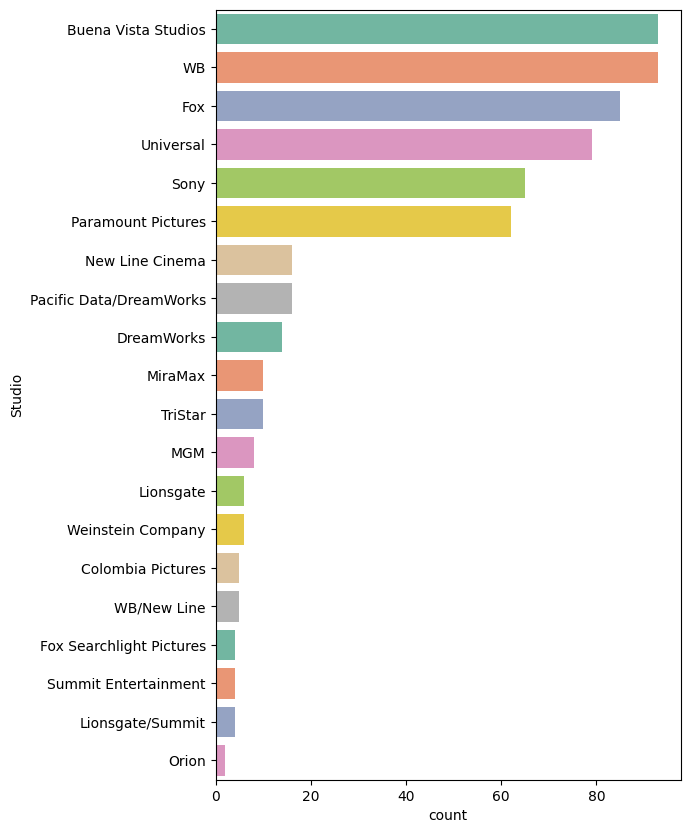

In [80]:
plt.figure(figsize=(6, 10), dpi=100)
sns.countplot(y="Studio", data=movies_df, palette="Set2", order=movies_df['Studio'].value_counts().index[0:20])
plt.show()

<br>

#### Lets see what genre of movies are most in this dataset.

In [81]:
movies_df['Genre'].unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

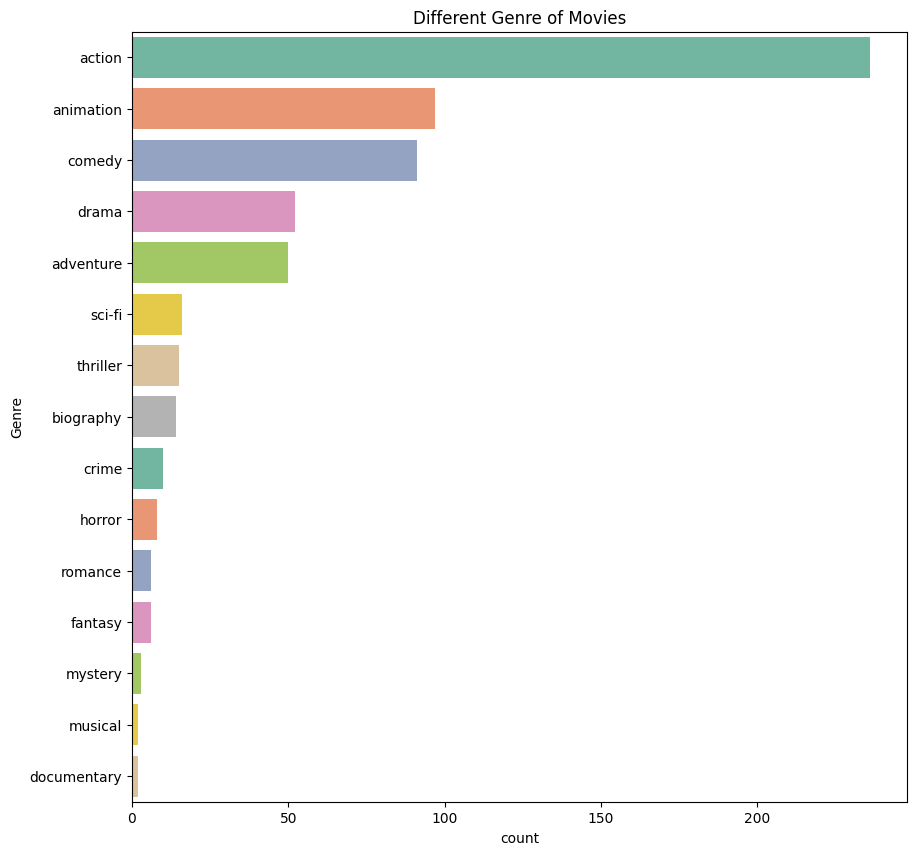

In [82]:
plt.figure(figsize=(10, 10), dpi=100)
sns.countplot(y="Genre", data=movies_df, palette="Set2", order=movies_df['Genre'].value_counts().index[0:15])
plt.title("Different Genre of Movies")
plt.show()


<br>

**In this Section we are going to see the `information` of our DataFrame.**

In [83]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day_of_Week            608 non-null    object 
 1   Director               608 non-null    object 
 2   Genre                  608 non-null    object 
 3   Title                  608 non-null    object 
 4   Release_date           608 non-null    object 
 5   Studio                 608 non-null    object 
 6   Gross_collection_mill  608 non-null    object 
 7   Budget_in_million      608 non-null    float64
 8   Adjusted_Gross_mill    608 non-null    object 
 9   IMDb_Rating            608 non-null    float64
 10  MovieLens_Rating       608 non-null    float64
 11  Overseas_mill          608 non-null    object 
 12  Overseas_percent       608 non-null    float64
 13  Profit_in_mill         608 non-null    object 
 14  Profit_percent         608 non-null    float64
 15  Runtim

#### Second Inconsistent Data 
I found that the profit/gross/net collections of movies are written as strings and are of object data type. Because of this, we could not calculate the mean budget collection of movies over the period of time.

Now, first I am going to change `(','}` into `no space ('')`. Then I am going to convert the string object type to `float`

In [84]:
# Making list of columns to adjust its datatypes.
col_to_adjust = ['Adjusted_Gross_mill','Gross_collection_mill', 'Overseas_mill', 'Profit_in_mill']

# Using for loop to adjust all the columns at a time.
for col_name in col_to_adjust:
    movies_df[col_name] = movies_df[col_name].str.replace(",", "")
    movies_df[col_name] = movies_df[col_name].astype(np.float64)

In [85]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day_of_Week            608 non-null    object 
 1   Director               608 non-null    object 
 2   Genre                  608 non-null    object 
 3   Title                  608 non-null    object 
 4   Release_date           608 non-null    object 
 5   Studio                 608 non-null    object 
 6   Gross_collection_mill  608 non-null    float64
 7   Budget_in_million      608 non-null    float64
 8   Adjusted_Gross_mill    608 non-null    float64
 9   IMDb_Rating            608 non-null    float64
 10  MovieLens_Rating       608 non-null    float64
 11  Overseas_mill          608 non-null    float64
 12  Overseas_percent       608 non-null    float64
 13  Profit_in_mill         608 non-null    float64
 14  Profit_percent         608 non-null    float64
 15  Runtim

In [86]:
movies_df.nunique()

Day_of_Week                6
Director                 337
Genre                     15
Title                    608
Release_date             534
Studio                    36
Gross_collection_mill    585
Budget_in_million        152
Adjusted_Gross_mill      561
IMDb_Rating               50
MovieLens_Rating         182
Overseas_mill            551
Overseas_percent         328
Profit_in_mill           566
Profit_percent           589
Runtime_in_minutes       102
US_mill                  535
Gross_percent_US         328
dtype: int64

In [87]:
movies_df.describe()

,Gross_collection_mill,Budget_in_million,Adjusted_Gross_mill,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas_percent,Profit_in_mill,Profit_percent,Runtime_in_minutes,US_mill,Gross_percent_US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,545.153125,92.467928,413.466118,6.923849,3.340378,246.332237,57.698849,320.945559,719.278783,117.781250,167.135197,42.301151
std,438.996563,59.421407,258.612104,0.925890,0.454071,184.581069,12.334237,233.887737,1942.807248,23.179122,92.465903,12.334237
min,202.100000,0.600000,200.300000,3.600000,1.490000,46.900000,17.200000,19.900000,7.700000,30.000000,0.000000,0.000000
25%,316.950000,45.000000,246.600000,6.375000,3.037500,135.525000,49.900000,180.700000,201.850000,100.000000,106.950000,33.700000
50%,425.950000,80.000000,327.750000,6.900000,3.365000,189.650000,58.200000,247.700000,338.550000,116.000000,141.700000,41.800000
75%,645.625000,130.000000,475.500000,7.600000,3.672500,283.650000,66.300000,389.750000,650.100000,130.250000,202.100000,50.100000
max,6846.700000,300.000000,2788.000000,9.200000,4.500000,2027.500000,100.000000,2551.000000,41333.300000,238.000000,760.500000,82.800000


<br>

#### Making separate columns for year only.

In [88]:
movies_df['Release_date'].sample(12)

493    23/03/2012
525    21/05/2010
209    14/07/1999
25     25/01/2013
595    21/05/1980
29     14/08/2009
368     2/11/2012
590    15/07/2011
242    25/12/2008
193    14/10/1994
347    25/12/2002
500    13/11/1991
Name: Release_date, dtype: object

In [89]:
movies_df['Release_date'] = pd.to_datetime(movies_df['Release_date'],
                                           format='mixed', dayfirst=True)

In [90]:
movies_df['Year'] = movies_df['Release_date'].dt.year
print(movies_df.Year.sample(5))

483    1992
359    2000
141    2006
286    2009
104    2002
Name: Year, dtype: int32


**We are going to count how many movies were released from `2007` to `2015`. After this, we will create a `doughnut plot` to visualize all the data and `explode` the year with the most movies released in a year.**

In [91]:
filter = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

counts = [len(movies_df[movies_df['Year'] == year_count]) for year_count in filter]
for year, count in zip(filter, counts):
    print(f"{year}: {count}")

2007: 26
2008: 32
2009: 33
2010: 38
2011: 34
2012: 37
2013: 39
2014: 42
2015: 16


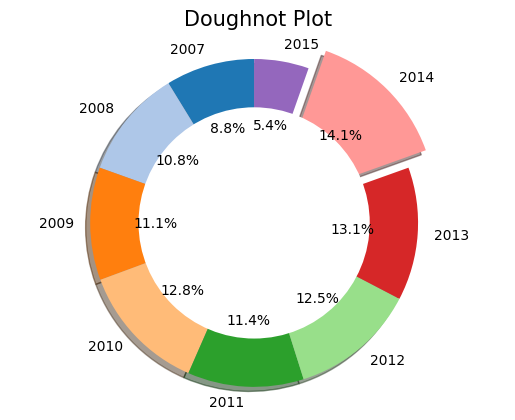

In [92]:
explode = (0, 0, 0, 0, 0, 0, 0, 0.15, 0) # Providing length as of elements in the data

# Create a doughnot Plot
fig, ax = plt.subplots()
ax.pie(counts, labels=filter, explode=explode, autopct='%1.1f%%', startangle=90,
       shadow=True, colors=plt.cm.tab20.colors[:len(counts)])
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 

# Draw a white circle at the center to create a doughnot plot
centre = plt.Circle((0,0), 0.7, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(centre)

# Title
plt.title("Doughnot Plot", color='Black', fontsize=15)

plt.show()

This `donut plot` helps us visualize the year with the highest number of movie releases between 2007 and 2015.

<br>

#### Income Growth of Different Genre over the year:

In [93]:
movies_df.columns

Index(['Day_of_Week', 'Director', 'Genre', 'Title', 'Release_date', 'Studio',
       'Gross_collection_mill', 'Budget_in_million', 'Adjusted_Gross_mill',
       'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas_percent',
       'Profit_in_mill', 'Profit_percent', 'Runtime_in_minutes', 'US_mill',
       'Gross_percent_US', 'Year'],
      dtype='object')

In [103]:
group_by_year = movies_df[['Gross_collection_mill', 'Adjusted_Gross_mill', 'Overseas_mill', 'Profit_in_mill', 'Year']].groupby(by='Year')
group_by_year.mean()

,Gross_collection_mill,Adjusted_Gross_mill,Overseas_mill,Profit_in_mill
Year,,,,
1939,6846.700000,400.200000,201.500000,396.300000
1961,1717.100000,215.900000,71.000000,140.900000
1967,2096.800000,294.500000,150.300000,224.000000
1972,1394.400000,245.100000,110.100000,238.100000
1973,2363.600000,441.300000,208.400000,429.300000
1975,2080.600000,470.700000,210.700000,458.700000
1977,1721.800000,438.766667,209.666667,427.266667
1978,1440.700000,395.000000,206.200000,389.000000
1979,688.800000,210.300000,140.000000,179.300000
